Importação das bibliotecas


In [10]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

Dados de produção diária de bicicletas de determinada empresa nos últimos 60 dias

In [12]:
dados = [
    85, 88, 66, 80, 80, 54, 91, 67, 80, 63, 76, 68,
    70, 80, 60, 55, 64, 59, 57, 70, 81, 59, 81, 76,
    74, 91, 72, 54, 60, 78, 59, 76, 70, 60, 79, 71,
    49, 57, 81, 93, 63, 73, 64, 78, 77, 61, 78, 72,
    67, 63, 73, 77, 67, 84, 68, 75, 65, 74, 60, 84
]


Calcular a estatística de teste de Shapiro-Francia

In [13]:
n = len(dados)
data_sorted = sorted(dados)
x_bar = np.mean(dados)

In [14]:
print("Contagem:", n)
print("Média:", x_bar)
print("Desvio padrão:", np.std(dados, ddof=1))
print("Data ordenada:", data_sorted)

Contagem: 60
Média: 70.95
Desvio padrão: 10.316064484127558
Data ordenada: [49, 54, 54, 55, 57, 57, 59, 59, 59, 60, 60, 60, 60, 61, 63, 63, 63, 64, 64, 65, 66, 67, 67, 67, 68, 68, 70, 70, 70, 71, 72, 72, 73, 73, 74, 74, 75, 76, 76, 76, 77, 77, 78, 78, 78, 79, 80, 80, 80, 80, 81, 81, 81, 84, 84, 85, 88, 91, 91, 93]


# Teste de Shapiro-Francia

Usado para amostras maiores e especialmente para detectar desvios de normalidade em caudas mais pesadas ou assimetria leve.

O Shapiro-Francia é uma modificação do Shapiro-Wilk, onde os coeficientes são calculados com base nos quantis esperados de uma normal padrão, e a estatística resultante também avalia o quão bem os dados se ajustam a uma distribuição normal.

Se os dados forem normais, a estatística do teste fica próxima de 1, e o p-valor é alto (tipicamente maior que 0,05).
Se não forem, a estatística se afasta de 1 e o p-valor cai.

In [15]:
result = pg.normality(dados, method='shapiro')

In [16]:
w = result['W'].values[0]
p_valor = result['pval'].values[0]
nivel_significancia = 0.05

W: estatística do teste (quanto mais próximo de 1, mais normal são os dados)

Aqui deu 0.9821 → ótimo, perto de 1.

pval: valor-p associado

0.5232 → bem acima de 0.05

normal: resultado lógico baseado no p-valor e nível de significância padrão (0.05)

True → ou seja, não há evidências para rejeitar a hipótese de normalidade

In [17]:
print(f'Estatística W: {w:.4f}')
print(f'Valor-p: {p_valor:.4f}')
print(f'Nível de significância: {nivel_significancia:.2f}')

Estatística W: 0.9821
Valor-p: 0.5232
Nível de significância: 0.05


Comparar o resultado e tirar a conclusão

In [18]:
if p_valor > nivel_significancia:
    print("Conclusão: Os dados seguem uma distribuição normal (não rejeitamos H0).")
else:
    print("Conclusão: Os dados NÃO seguem uma distribuição normal (rejeitamos H0).")

Conclusão: Os dados seguem uma distribuição normal (não rejeitamos H0).


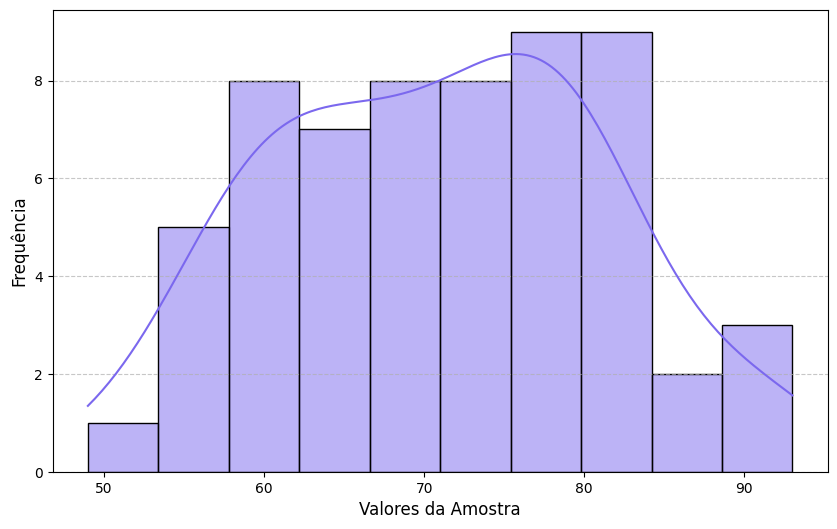

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(dados, bins=10, kde=True, color='mediumslateblue', edgecolor='black')

plt.xlabel('Valores da Amostra', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Grade horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrando o gráfico
plt.show()